__Aim:__ Consistency analysis across cell lines using pathway enrichment results to find commonly up/down regulated pathways and their genes. 

___
- https://github.com/abearab/ipage-msigdb
- https://github.com/tanghaibao/goatools
- https://gseapy.readthedocs.io/en/latest/index.html

Hani: _"You must redo iPAGE with `--independence=0` option for comparing results between multiple smaples."_

In [1]:
import re
import sys
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from time import time 
from glob import glob
from matplotlib.pyplot import subplots
from itertools import chain
from functools import reduce
from venn import venn

# sys.path.append('/rumi/shams/abe/Projects/ipage-down/')
sys.path.append('/data_gilbert/home/aarab/Projects/pager/')

import upsetplot as us
import ipage_down as ipd
from matplotlib.backends.backend_pdf import PdfPages

from IPython.display import IFrame

In [2]:
pagerdir='/data_gilbert/home/aarab/Projects/pager'

In [3]:
# def get_pvmatrix_list(parent_path,pattern):
#     """
#     pattern: msigdb gene set cluster name 
#     """
#     return glob(f'{parent_path}/*{pattern}*/pvmatrix.txt')

# def get_pv_signal(exp,patterns,pdf=None):
#     """
#     exp: experiment name
#     patterns: list of patterns
#     """
#     cols = pd.concat([
#         ipd.pvmat2bio_signal(ipd.merge_multiple_pvmat(
#             get_pvmatrix_list(f"{exp}_fdr","c1")
#         ),s,n_clust=1) for s in ['up','both','down']
#     ]).columns
    
#     pv_signal = pd.concat([
#         ipd.pvmat2bio_signal(ipd.merge_multiple_pvmat([
#             pvmat for pattern in patterns
#             for pvmat in 
#             get_pvmatrix_list(f"{exp}",pattern) + \
#             get_pvmatrix_list(f"{exp}_fdr",pattern)
#         ]),s,n_clust=2) for s in ['up','both','down']
#     ])
    
#     pv_signal.columns = cols
#     pv_signal=pv_signal[~pv_signal.duplicated()]
    
#     if pdf:
#         pv_signal.to_csv('temp-pvmatrix.txt',sep='\t')
    
#         !bash {pager_dir}/ipage_draw_matrix.sh \
#             {exp}'.txt' "temp-pvmatrix.txt" \
#             {pdf} &> /dev/null
    
#         !rm -v 'temp-pvmatrix.txt'
#     else: 
#         return pv_signal


In [3]:
dictfilt = lambda x, y: dict([ (i,x[i]) for i in x if i in set(y) ])

In [8]:
sys.path[-1]

'/data_gilbert/home/aarab/Projects/pager/'

In [9]:
!cat /data_gilbert/home/aarab/Projects/pager/ipage_loop.sh

## $1: input file contain table with first two columns as gene name/id and numeric value
# pattern='msigdb_v0.3_m*'
pattern='msigdb_v7*'


expfile=`basename $1`
outdir=${1/.txt/};

mkdir -p $outdir
cd $outdir; cd ../

for f in `ls -d $PAGEDIR/PAGE_DATA/ANNOTATIONS/${pattern}`; do
    base=`basename "$f"`;
    echo '________________' $base '________________';
    if [ -d "${outdir}/${base}/" ]; 
    then
        echo 'This result exist!';
    else
        # Run iPAGE 
        perl $PAGEDIR/page.pl --expfile=$expfile --species=$base --exptype=continuous --ebins=11 --nodups=1 --independence=0;
            # --independence=0; option for comparing results between multiple smaples.
        wait
        mv -v ${expfile}_PAGE/ ${outdir}/${base}/;
        # remove the result folder if it was empty
        counter="$(wc -l < ${outdir}/${base}/pvmatrix.txt)"
        if [ $counter -le "$(echo '1')" ] || [ -z $counter ]
        then
            rm -r ${outdir}/${base}
        fi;
        rm -r \
  

## $\Delta$Expression

#### `ind0`

In [ ]:
%%bash
export PAGEDIR='/data_gilbert/home/aarab/iPAGE'

cd exp/
ls *_delta_exp.txt | parallel -j18 -k bash /data_gilbert/home/aarab/Projects/pager/ipage_loop.sh
cd ../

### Remake from pvmatrix (correct bin clusters)

In [8]:
cell_line_pws = {}

In [5]:
# def read_ipage_intersections_file(gs_cluster_path,clust,gs=None):
#     with open(f'{gs_cluster_path}/output.ipage_intersections') as raw:
#         lines = [line for line in raw.read().splitlines()]
#         if gs: 
#             lines = [line.split('\t') for line in lines if re.search(gs, line)]
#         else:
#             lines = [line.split('\t') for line in lines]

#     #     left  = dict([(line[0].split(' ')[0],line[2:]) for line in lines if line[1] == '0' ])
#     #     right = dict([(line[0].split(' ')[0],line[2:]) for line in lines if line[1] == '10'])
#     # return left,right
#     return dict([(line[0].split(' ')[0],line[2:]) for line in lines if line[1] == clust ])


# def merge_multiple_pvmat(pvmat_list):
#     df = ipd.clean_bins_range(
#         ipd.read_pvmatrix(pvmat_list[0])
#     )

#     cols = df.columns

#     df = pd.concat(
#         [df] + [
#             ipd.read_pvmatrix(pvmat).set_axis(cols, axis=1, inplace=False) 
#             for pvmat in pvmat_list[1:]
#         ]
#     )

#     df = df.groupby(df.index).first()
#     # ipd.style_clean_pvmatrix(df.iloc[:,[0,10]])    
#     return df

# def pvmat2bio_signal(pvmat,side,n_clust=2):
#     if side == 'up':
#         out = pvmat.loc[
#             (pd.DataFrame(pvmat.iloc  [:,-n_clust:]  > 2).all(axis=1)) & 
#             (pd.DataFrame(pvmat.iloc  [:,:-n_clust]  < 2).all(axis=1))
#             ,:
#         ].sort_values(by=pvmat.columns[-n_clust:].to_list()[::-1],ascending=False,axis=0)
#     elif side == 'both':
#         out = pvmat.loc[
#             (pd.DataFrame(pvmat.iloc  [:,:n_clust]  > 2).all(axis=1)) & 
#             (pd.DataFrame(pvmat.iloc  [:,-n_clust:]  > 2).all(axis=1)) & 
#             (pd.DataFrame(pvmat.iloc  [:,n_clust+1:-n_clust]  < 2).all(axis=1))
#             ,:
#         ].sort_values(
#             by=pvmat.columns[-n_clust:].to_list()[::-1] + pvmat.columns[:n_clust].to_list(),
#             ascending=False,axis=0
#         )
#     elif side == 'down':
#         out = pvmat.loc[
#             (pd.DataFrame(pvmat.iloc  [:,:n_clust]  > 2).all(axis=1)) & 
#             (pd.DataFrame(pvmat.iloc  [:,n_clust+1:]  < 2).all(axis=1))
#             ,:
#         ].sort_values(by=pvmat.columns[:n_clust].to_list(),ascending=False,axis=0)
#     return out

# def detect_gs_cluster(pvmat_list, gs):
#     return [
#         pvmat for pvmat in pvmat_list
#         if gs in ipd.read_pvmatrix(pvmat).index.to_list()
        
#     ]

### HL-60 time series

In [6]:
# cell_line_pws ['120h'] = merge_multiple_pvmat(
#     pvmat_list = glob('exp/hl60_120h_delta_exp_ind0/*c5*/pvmatrix.[L-R].txt')
# )

#### hl60 6h delta_exp

In [24]:
study = 'hl60_6h_delta_exp'

pvmat = ipd.merge_multiple_pvmat(
    pvmat_list = glob(f'exp/{study}/*c5.go.mf*/pvmatrix.txt')
)

bio_signal = pd.concat([
    ipd.pvmat2bio_signal(pvmat,side='down',n_clust=2),
    ipd.pvmat2bio_signal(pvmat,side='up',n_clust=2),
    ipd.pvmat2bio_signal(pvmat,side='both'),
],axis=0)

bio_signal.to_csv(f'exp/{study}_pvmatrix.txt',sep='\t')
cell_line_pws[study] = bio_signal
exp_file = f'{study}.txt'
pvmat_file = f'{study}_pvmatrix.txt'
pdf_file = f'{study}.pdf'

!cd exp; bash {pagerdir}/ipage_draw_matrix.sh $exp_file $pvmat_file $pdf_file &> /dev/null; cd ../

In [25]:
pdf = 'exp/hl60_6h_delta_exp.pdf'
IFrame(pdf, width=800, height=300)

In [26]:
# gs_cluster_path = ipd.detect_gs_cluster(pvmat_list, gs=gs)

# print ([p.split('/')[1:3] for p in gs_cluster_path])

# gs_cluster_path = gs_cluster_path[1].split('pvmatrix.R.txt')[0]
# print ('Down')
# print (ipd.bin_identifier_genes(gs_cluster_path, '0', gs=gs))
# print ('Up')
# print (ipd.bin_identifier_genes(gs_cluster_path, '9', gs=gs))
# print (ipd.bin_identifier_genes(gs_cluster_path, '10', gs=gs))

#### hl60 72h delta_exp

In [27]:
study = 'hl60_72h_delta_exp'

pvmat = ipd.merge_multiple_pvmat(
    pvmat_list = glob(f'exp/{study}/*c5.go.mf*/pvmatrix.txt') #+ glob(f'exp/{study}_ind1/*c2.cp.kegg*/pvmatrix.txt')
)

bio_signal = pd.concat([
    ipd.pvmat2bio_signal(pvmat,side='down',n_clust=2),
    ipd.pvmat2bio_signal(pvmat,side='up',n_clust=2),
    ipd.pvmat2bio_signal(pvmat,side='both'),
],axis=0)

cell_line_pws[study] = bio_signal

bio_signal.to_csv(f'exp/{study}_pvmatrix.txt',sep='\t')

exp_file = f'{study}.txt'
pvmat_file = f'{study}_pvmatrix.txt'
pdf_file = f'{study}.pdf'

!cd exp; bash {pagerdir}/ipage_draw_matrix.sh $exp_file $pvmat_file $pdf_file &> /dev/null; cd ../

In [28]:
pdf = 'exp/hl60_72h_delta_exp.pdf'
IFrame(pdf, width=800, height=500)

In [29]:
study = 'hl60_72h_delta_exp'

pvmat = ipd.merge_multiple_pvmat(
    pvmat_list = glob(f'exp/{study}/*c3.mir*/pvmatrix.txt')
)

bio_signal = pd.concat([
    ipd.pvmat2bio_signal(pvmat,side='down',n_clust=1),
    ipd.pvmat2bio_signal(pvmat,side='up',n_clust=1),
    ipd.pvmat2bio_signal(pvmat,side='both'),
],axis=0)

bio_signal

,[-1.18 -0.88],[-0.88 -0.52],[-0.52 -0.28],[-0.28 -0.07],[-0.07 0.00],[0.00 0.16],[0.16 0.39],[0.39 0.58],[0.58 0.87],[0.87 1.81],[1.81 2.11]
MIR210_5P,2.897,-0.977,-0.382,0.397,1.958,-0.382,-0.382,-2.322,0.233,-0.382,-0.620
MIR320A_5P,-0.493,-0.929,0.527,-0.929,-2.102,0.527,1.138,-0.493,1.397,-1.237,2.323


#### hl60 120h delta_exp

In [30]:
study = 'hl60_120h_delta_exp'

In [31]:
pvmat = ipd.merge_multiple_pvmat(
    pvmat_list = glob(f'exp/{study}/*c5.go.mf*/pvmatrix.txt')
)

bio_signal = pd.concat([
    ipd.pvmat2bio_signal(pvmat,side='down',n_clust=2),
    ipd.pvmat2bio_signal(pvmat,side='up',n_clust=2),
    ipd.pvmat2bio_signal(pvmat,side='both'),
],axis=0)

cell_line_pws[study] = bio_signal

bio_signal.to_csv(f'exp/{study}_pvmatrix.txt',sep='\t')

exp_file = f'{study}.txt'
pvmat_file = f'{study}_pvmatrix.txt'
pdf_file = f'{study}.pdf'

!cd exp; bash {pagerdir}/ipage_draw_matrix.sh $exp_file $pvmat_file $pdf_file &> /dev/null; cd ../

In [32]:
pdf = f'exp/{study}.pdf'
IFrame(pdf, width=800, height=500)

In [81]:
gs = "GOMF_RNA_METHYLTRANSFERASE_ACTIVITY"
# ipd.detect_gs_cluster(glob(f'exp/{study}/*c5.go.mf*/pvmatrix.txt'), gs)[0]

{
    g 
    for c in ["0","1"]
    for g in list(ipd.bin_identifier_genes("exp/hl60_120h_delta_exp/msigdb_v7.4_c5.go.mf", c, gs).values())[0]
}

{'ALKBH8',
 'BUD23',
 'DIMT1',
 'EMG1',
 'FBL',
 'FTSJ1',
 'FTSJ3',
 'METTL1',
 'METTL16',
 'METTL2A',
 'METTL5',
 'METTL8',
 'MRM1',
 'MRM2',
 'MRM3',
 'NOP2',
 'NSUN2',
 'NSUN4',
 'RNMT',
 'TARBP1',
 'TFB1M',
 'TFB2M',
 'TGS1',
 'THUMPD2',
 'TRMT1',
 'TRMT10C',
 'TRMT11',
 'TRMT2A',
 'TRMT44',
 'TRMT5',
 'TRMT6',
 'TRMT61A',
 'TRMT61B',
 'TYW3',
 'WDR4',
 'ZCCHC4'}

### 72h trearment in all cell lines 

#### hl60_72h_only_delta_exp

In [158]:
study = 'hl60_72h_only_delta_exp'

pvmat = ipd.merge_multiple_pvmat(
    pvmat_list = glob(f'exp/{study}/*c5.go.bp*/pvmatrix.txt')
)

bio_signal = pd.concat([
    ipd.pvmat2bio_signal(pvmat,side='down',n_clust=2),
    ipd.pvmat2bio_signal(pvmat,side='up',n_clust=2),
    ipd.pvmat2bio_signal(pvmat,side='both'),
],axis=0)

bio_signal.to_csv(f'exp/{study}_pvmatrix.txt',sep='\t')
cell_line_pws[study] = bio_signal
exp_file = f'{study}.txt'
pvmat_file = f'{study}_pvmatrix.txt'
pdf_file = f'{study}.pdf'

!cd exp; bash {pagerdir}/ipage_draw_matrix.sh $exp_file $pvmat_file $pdf_file &> /dev/null; cd ../

In [159]:
pdf = 'exp/hl60_72h_only_delta_exp.pdf'
IFrame(pdf, width=800, height=300)

#### molm14_delta_exp

In [138]:
study = 'molm14_delta_exp'

pvmat = ipd.merge_multiple_pvmat(
    pvmat_list = glob(f'exp/{study}/*c5.go.bp*/pvmatrix.txt')
)

bio_signal = pd.concat([
    ipd.pvmat2bio_signal(pvmat,side='down',n_clust=2),
    ipd.pvmat2bio_signal(pvmat,side='up',n_clust=2),
    ipd.pvmat2bio_signal(pvmat,side='both'),
],axis=0)

bio_signal.to_csv(f'exp/{study}_pvmatrix.txt',sep='\t')
cell_line_pws[study] = bio_signal
exp_file = f'{study}.txt'
pvmat_file = f'{study}_pvmatrix.txt'
pdf_file = f'{study}.pdf'

!cd exp; bash {pagerdir}/ipage_draw_matrix.sh $exp_file $pvmat_file $pdf_file &> /dev/null; cd ../

In [140]:
pdf = 'exp/molm14_delta_exp.pdf'
IFrame(pdf, width=800, height=300)

#### ociaml2_delta_exp

In [147]:
study = 'ociaml2_delta_exp'

pvmat = ipd.merge_multiple_pvmat(
    pvmat_list = glob(f'exp/{study}/*c5.go.bp*/pvmatrix.txt')
)

bio_signal = pd.concat([
    ipd.pvmat2bio_signal(pvmat,side='down',n_clust=2),
    ipd.pvmat2bio_signal(pvmat,side='up',n_clust=2),
    ipd.pvmat2bio_signal(pvmat,side='both'),
],axis=0)

bio_signal.to_csv(f'exp/{study}_pvmatrix.txt',sep='\t')
cell_line_pws[study] = bio_signal
exp_file = f'{study}.txt'
pvmat_file = f'{study}_pvmatrix.txt'
pdf_file = f'{study}.pdf'

!cd exp; bash {pagerdir}/ipage_draw_matrix.sh $exp_file $pvmat_file $pdf_file &> /dev/null; cd ../

In [148]:
pdf = 'exp/ociaml2_delta_exp.pdf'
IFrame(pdf, width=800, height=300)

#### ociaml3_delta_exp

In [149]:
study = 'ociaml3_delta_exp'

pvmat = ipd.merge_multiple_pvmat(
    pvmat_list = glob(f'exp/{study}/*c5.go.bp*/pvmatrix.txt')
)

bio_signal = pd.concat([
    ipd.pvmat2bio_signal(pvmat,side='down',n_clust=2),
    ipd.pvmat2bio_signal(pvmat,side='up',n_clust=2),
    ipd.pvmat2bio_signal(pvmat,side='both'),
],axis=0)

bio_signal.to_csv(f'exp/{study}_pvmatrix.txt',sep='\t')
cell_line_pws[study] = bio_signal
exp_file = f'{study}.txt'
pvmat_file = f'{study}_pvmatrix.txt'
pdf_file = f'{study}.pdf'

!cd exp; bash {pagerdir}/ipage_draw_matrix.sh $exp_file $pvmat_file $pdf_file &> /dev/null; cd ../

In [150]:
pdf = 'exp/ociaml3_delta_exp.pdf'
IFrame(pdf, width=800, height=300)

#### thp1_delta_exp

In [151]:
study = 'thp1_delta_exp'

pvmat = ipd.merge_multiple_pvmat(
    pvmat_list = glob(f'exp/{study}/*c5.go.bp*/pvmatrix.txt')
)

bio_signal = pd.concat([
    ipd.pvmat2bio_signal(pvmat,side='down',n_clust=2),
    ipd.pvmat2bio_signal(pvmat,side='up',n_clust=2),
    ipd.pvmat2bio_signal(pvmat,side='both'),
],axis=0)

bio_signal.to_csv(f'exp/{study}_pvmatrix.txt',sep='\t')
cell_line_pws[study] = bio_signal
exp_file = f'{study}.txt'
pvmat_file = f'{study}_pvmatrix.txt'
pdf_file = f'{study}.pdf'

!cd exp; bash {pagerdir}/ipage_draw_matrix.sh $exp_file $pvmat_file $pdf_file &> /dev/null; cd ../

In [152]:
pdf = 'exp/thp1_delta_exp.pdf'
IFrame(pdf, width=800, height=300)

#### kg1_delta_exp

In [154]:
study = 'kg1_delta_exp'

pvmat = ipd.merge_multiple_pvmat(
    pvmat_list = glob(f'exp/{study}/*c5.go.bp*/pvmatrix.txt')
)

bio_signal = pd.concat([
    ipd.pvmat2bio_signal(pvmat,side='down',n_clust=2),
    ipd.pvmat2bio_signal(pvmat,side='up',n_clust=2),
    ipd.pvmat2bio_signal(pvmat,side='both'),
],axis=0)

bio_signal.to_csv(f'exp/{study}_pvmatrix.txt',sep='\t')
cell_line_pws[study] = bio_signal
exp_file = f'{study}.txt'
pvmat_file = f'{study}_pvmatrix.txt'
pdf_file = f'{study}.pdf'

!cd exp; bash {pagerdir}/ipage_draw_matrix.sh $exp_file $pvmat_file $pdf_file &> /dev/null; cd ../

In [155]:
pdf = 'exp/kg1_delta_exp.pdf'
IFrame(pdf, width=800, height=300)

# Intersection 

### HL-60

In [131]:
data = dict([
    ('6h_dn',  set(cell_line_pws['hl60_6h_delta_exp'  ].loc[cell_line_pws['hl60_6h_delta_exp'].iloc  [:,0]   > 2,:].index.to_list())),
    ('6h_up',  set(cell_line_pws['hl60_6h_delta_exp'  ].loc[cell_line_pws['hl60_6h_delta_exp'].iloc  [:,10]  > 2,:].index.to_list())),
    ('72h_dn', set(cell_line_pws['hl60_72h_delta_exp' ].loc[cell_line_pws['hl60_72h_delta_exp'].iloc [:,0]   > 2,:].index.to_list())),
    ('72h_up', set(cell_line_pws['hl60_72h_delta_exp' ].loc[cell_line_pws['hl60_72h_delta_exp'].iloc [:,10]  > 2,:].index.to_list())),
    ('120h_dn',set(cell_line_pws['hl60_120h_delta_exp'].loc[cell_line_pws['hl60_120h_delta_exp'].iloc[:,0]   > 2,:].index.to_list())),
    ('120h_up',set(cell_line_pws['hl60_120h_delta_exp'].loc[cell_line_pws['hl60_120h_delta_exp'].iloc[:,10]  > 2,:].index.to_list())),
])

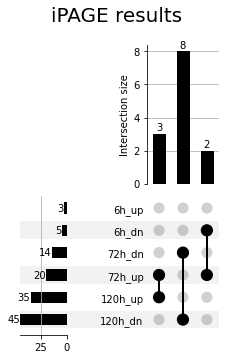

In [132]:
fig1 = plt.figure()
upset1 = us.UpSet(
    us.from_contents(data),
    # min_subset_size=5,
    min_degree=2,
    # max_degree=3,
    orientation='horizontal',show_counts=True,
)
# upset1.style_subsets(present='hl60_72h_only',edgecolor="red",linewidth=2)
upset1.plot(fig=fig1)
fig1.suptitle('iPAGE results',fontsize=20)
plt.show()
# pdf.savefig()

### AML CELL LINE PANEL

In [137]:
# plt.figure(figsize=(8,8))

# # Make venn diagram                                                                                                                                                             
# v = venn3_unweighted(
#     [Exp_down,Rho_down,Hyper_m6A],('ΔRNA Expression\nlog2FC < -0.1','ΔPhenotype (ρ)\nlog2FC < -0.1','ΔRNA Methylation\nlog2FC > 1')
#     ,normalize_to=0.5
# )

# for x in ['100','010','001','110','101','011']:
#     v.get_patch_by_id(x).set_alpha(0.5)
#     v.get_patch_by_id(x).set_color('lightgrey')
#     v.get_label_by_id(x).set_fontsize(12)

# v.get_patch_by_id('111').set_color('y')
# v.get_label_by_id('111').set_fontsize(15)


# c = venn3_circles(
#     (1,1,1,1,1,1,1), linestyle='dashed'
#     ,normalize_to=0.5
# )
# for i,_ in enumerate(c):
#     c[i].set_lw(1.0)
#     c[i].set_ls('dotted')

# plt.title("Intersectional genes", fontsize=20)
# plt.annotate(
#     venn_genes_label, xy=v.get_label_by_id('111').get_position() - np.array([0, 0.05]), 
#     xytext=(-180,-250),
#     ha='center', textcoords='offset points', bbox=dict(boxstyle='round,pad=0.5', fc='gray', alpha=0.1),
#     fontsize=12, 
#     arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5',color='gray')
# )

# plt.figtext(
#     0.5, 0.08, "pvalue < 0.05", ha="center", fontsize=10, 
#     bbox={"facecolor":"lightgray", "alpha":0.1, "pad":5}
# )

# plt.savefig('intersectional-genes/venn_plot_Exp_down_Rho_down_Hyper_m6A.pdf')
# plt.show()

___
# 

In [162]:
!date

Wed Oct 19 14:55:19 PDT 2022
